In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix



In [255]:
data = pd.read_csv('data.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [256]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [257]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

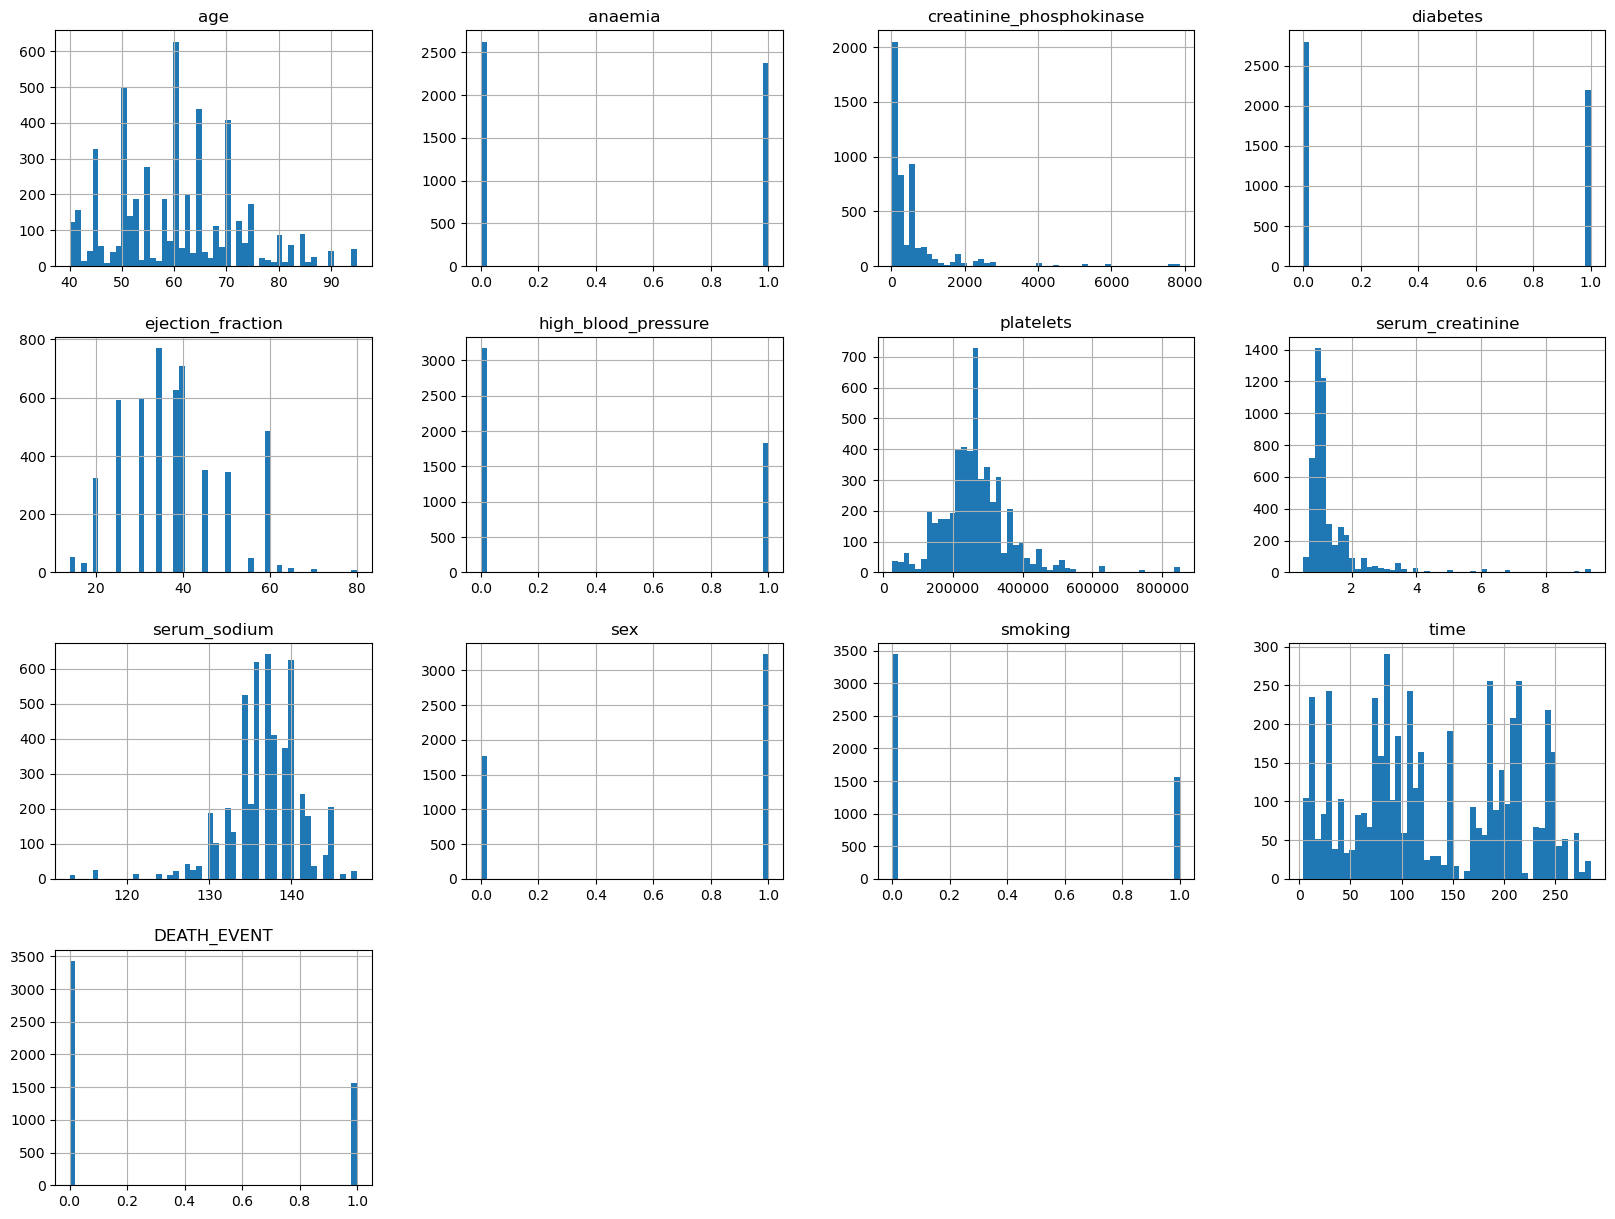

In [258]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [259]:
X = data.drop(columns=['DEATH_EVENT'],axis=1)
y = data['DEATH_EVENT']

In [260]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [261]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 5000, dtype: int64

In [262]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [263]:
standardized = scaler.transform(X)

In [264]:
X = standardized

In [265]:
X

array([[-0.45218052, -0.95004606,  0.16509667, ...,  0.74090938,
         1.48565948, -0.55198909],
       [ 0.4028073 , -0.95004606, -0.54345778, ...,  0.74090938,
        -0.67310175,  0.9871053 ],
       [-1.30716834, -0.95004606, -0.00487449, ..., -1.34969272,
        -0.67310175,  1.46564726],
       ...,
       [ 2.96777077,  1.05258054, -0.48611812, ..., -1.34969272,
        -0.67310175, -1.37973734],
       [ 0.4028073 ,  1.05258054, -0.43696983, ..., -1.34969272,
        -0.67310175, -1.5866744 ],
       [-1.73466225, -0.95004606, -0.35096033, ..., -1.34969272,
        -0.67310175,  0.56029761]])

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [267]:
logreg = LogisticRegression()

In [268]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [269]:
predictions = logreg.predict(X_test)

In [270]:
test_accuracy = logreg.score(X_test,y_test)
test_accuracy

0.851

In [271]:
train_accuracy = logreg.score(X_train,y_train)
train_accuracy

0.8505

In [272]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [273]:
y_test

1501    0
2586    1
2653    1
1055    1
705     0
       ..
4711    0
2313    1
3214    0
2732    0
1926    1
Name: DEATH_EVENT, Length: 1000, dtype: int64

In [274]:
accuracy = logreg.score(X_test,y_test)
precision = precision_score(y_test,predictions, average='micro')
recall = recall_score(y_test,predictions,average='micro')
f1 = f1_score(y_test,predictions,average='micro')

In [275]:
accuracy

0.851

In [276]:
precision

0.851

In [277]:
recall

0.851

In [278]:
f1

0.851

In [279]:
param_grid = {'C':[0.1,1,10],'penalty':['l1','l2']}
grid_search = GridSearchCV(logreg,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X,y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [280]:
print('The best hyperparameter for our model are :',grid_search.best_params_)

The best hyperparameter for our model are : {'C': 1, 'penalty': 'l2'}


In [281]:
#input_sample = (age,anaemia,creatinine,diabetes,ejection_fraction,high_blood,platelets,serum_C,serum_S,sex,smoking,time)
input_sample = (72,0,90,0,20,0,260090.03,1.9,120,1,0,190)
input_np_array = np.asarray(input_sample)
input_np_array_reshaped = input_np_array.reshape(1,-1)

In [282]:
std_data = scaler.transform(input_np_array_reshaped)
std_data

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.00129878, -0.95004606, -0.50864442, -0.88532653, -1.54030372,
        -0.75783066, -0.05087638,  0.52582031, -3.76545571,  0.74090938,
        -0.67310175,  0.76723468]])

In [283]:
prediction_test = logreg.predict(std_data)
prediction_test

array([1])

In [284]:
if (prediction_test[0]==0):
    print("Person will not die")
else:
    print("Person will die")

Person will die
